## 🕹️ 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
##### [프로그램 분석]
    - 합성곱을 사용해 이미지를 분류합니다.

In [62]:
# 먼저 케라스를 불러옵시다.
from tensorflow import keras

In [63]:
# 훈련세트 분류 라이브러리를 불러오고.
from sklearn.model_selection import train_test_split
# 데이터를 불러옵니다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 커널을 사용하여려면 28*28개의 배열에서 1이라는 깊이가 있어야 합니다.
# 그래서 reshape를 사용해서 4만8천개의 데이터를 28*28*1의 상태로 바꾼 후, 전처리해줄게요.
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                      train_target,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [65]:
# 먼저 모델을 구축하고,
model = keras.Sequential()
# 컨벡스 층을 구성합시다.
# 32개의 필터가 있고, 도장의 크기는 3으로 지정하겠다는 의미입니다.
# 특성맵을 28*28*1로 만들어 주기 위해서 패딩을 same으로 설정하는게 좋겠네요.
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                             padding='same', input_shape=(28, 28, 1)))

/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# 풀링층을 사용할텐데, Max풀링을 사용하면 특성맵의 결과에서 2*2크기의 도장을 찍으면 해당 도장은 4개의 값이 나오잖아요?
# 4개의 값중 가장 큰 값을 골라서 사용하겠다는 의미입니다. 이렇게 하면 해당 특성맵은 절반으로 줄어들어 14*14*1이 되겠죠.
model.add(keras.layers.MaxPooling2D(2))

In [67]:
# 중간에 합성곱층을 하나 더 추가합니다. 이번에는 필터를 64개로 둘게요.
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [68]:
# 100개의 뉴런에 집어넣어야하니, Flatten으로 펼쳐주고요.
model.add(keras.layers.Flatten())
# 100개의 뉴런을 사용하고,
model.add(keras.layers.Dense(100, activation='relu'))
# Dropout으로 과적합을 방지합니다.
model.add(keras.layers.Dropout(0.4))
# 결과는 10개 중 하나이니, 10으로 둡시다.
model.add(keras.layers.Dense(10, activation='softmax'))

In [69]:
# 첫번째 합성곱 층에서 3*3*1의 커널을 찍는데 총 필터가 32개죠? 각각의 32개의 층에는 절편의 값이 있을테니,
# 첫번째에서의 파라미터의 개수는 3*3*1*32+32 = 320입니다.

# 두번째 맥스풀링에서는 원래 28*28의 값이 14*14로 절반 줄어든 모습을 볼 수 있죠.

# 세번째 합성곱 층에서는 3*3*1의커널을 찍고, 필터가 64개이니 3*3*1*32*64+64가 되겠네요.
# 32를 더 곱한 이유는 전 층에서 사용된 값이기 때문입니다.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

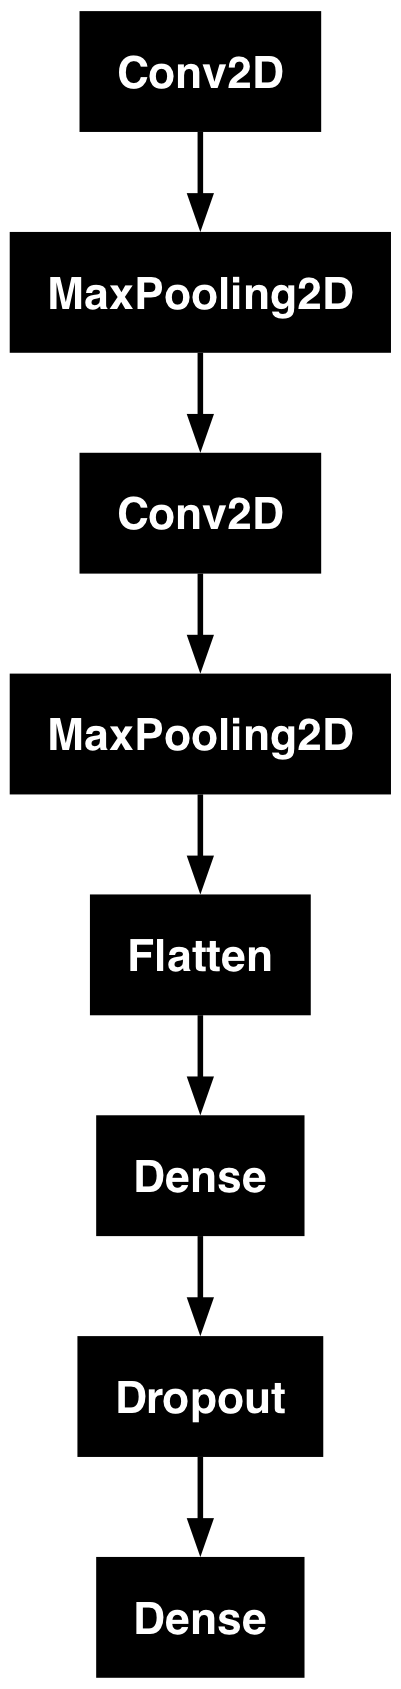

In [70]:
# keras.utils.plot_model을 사용하면 어떤 층으로 해당 모델이 구축되었는지를 확인할 수 있습니다.
keras.utils.plot_model(model)

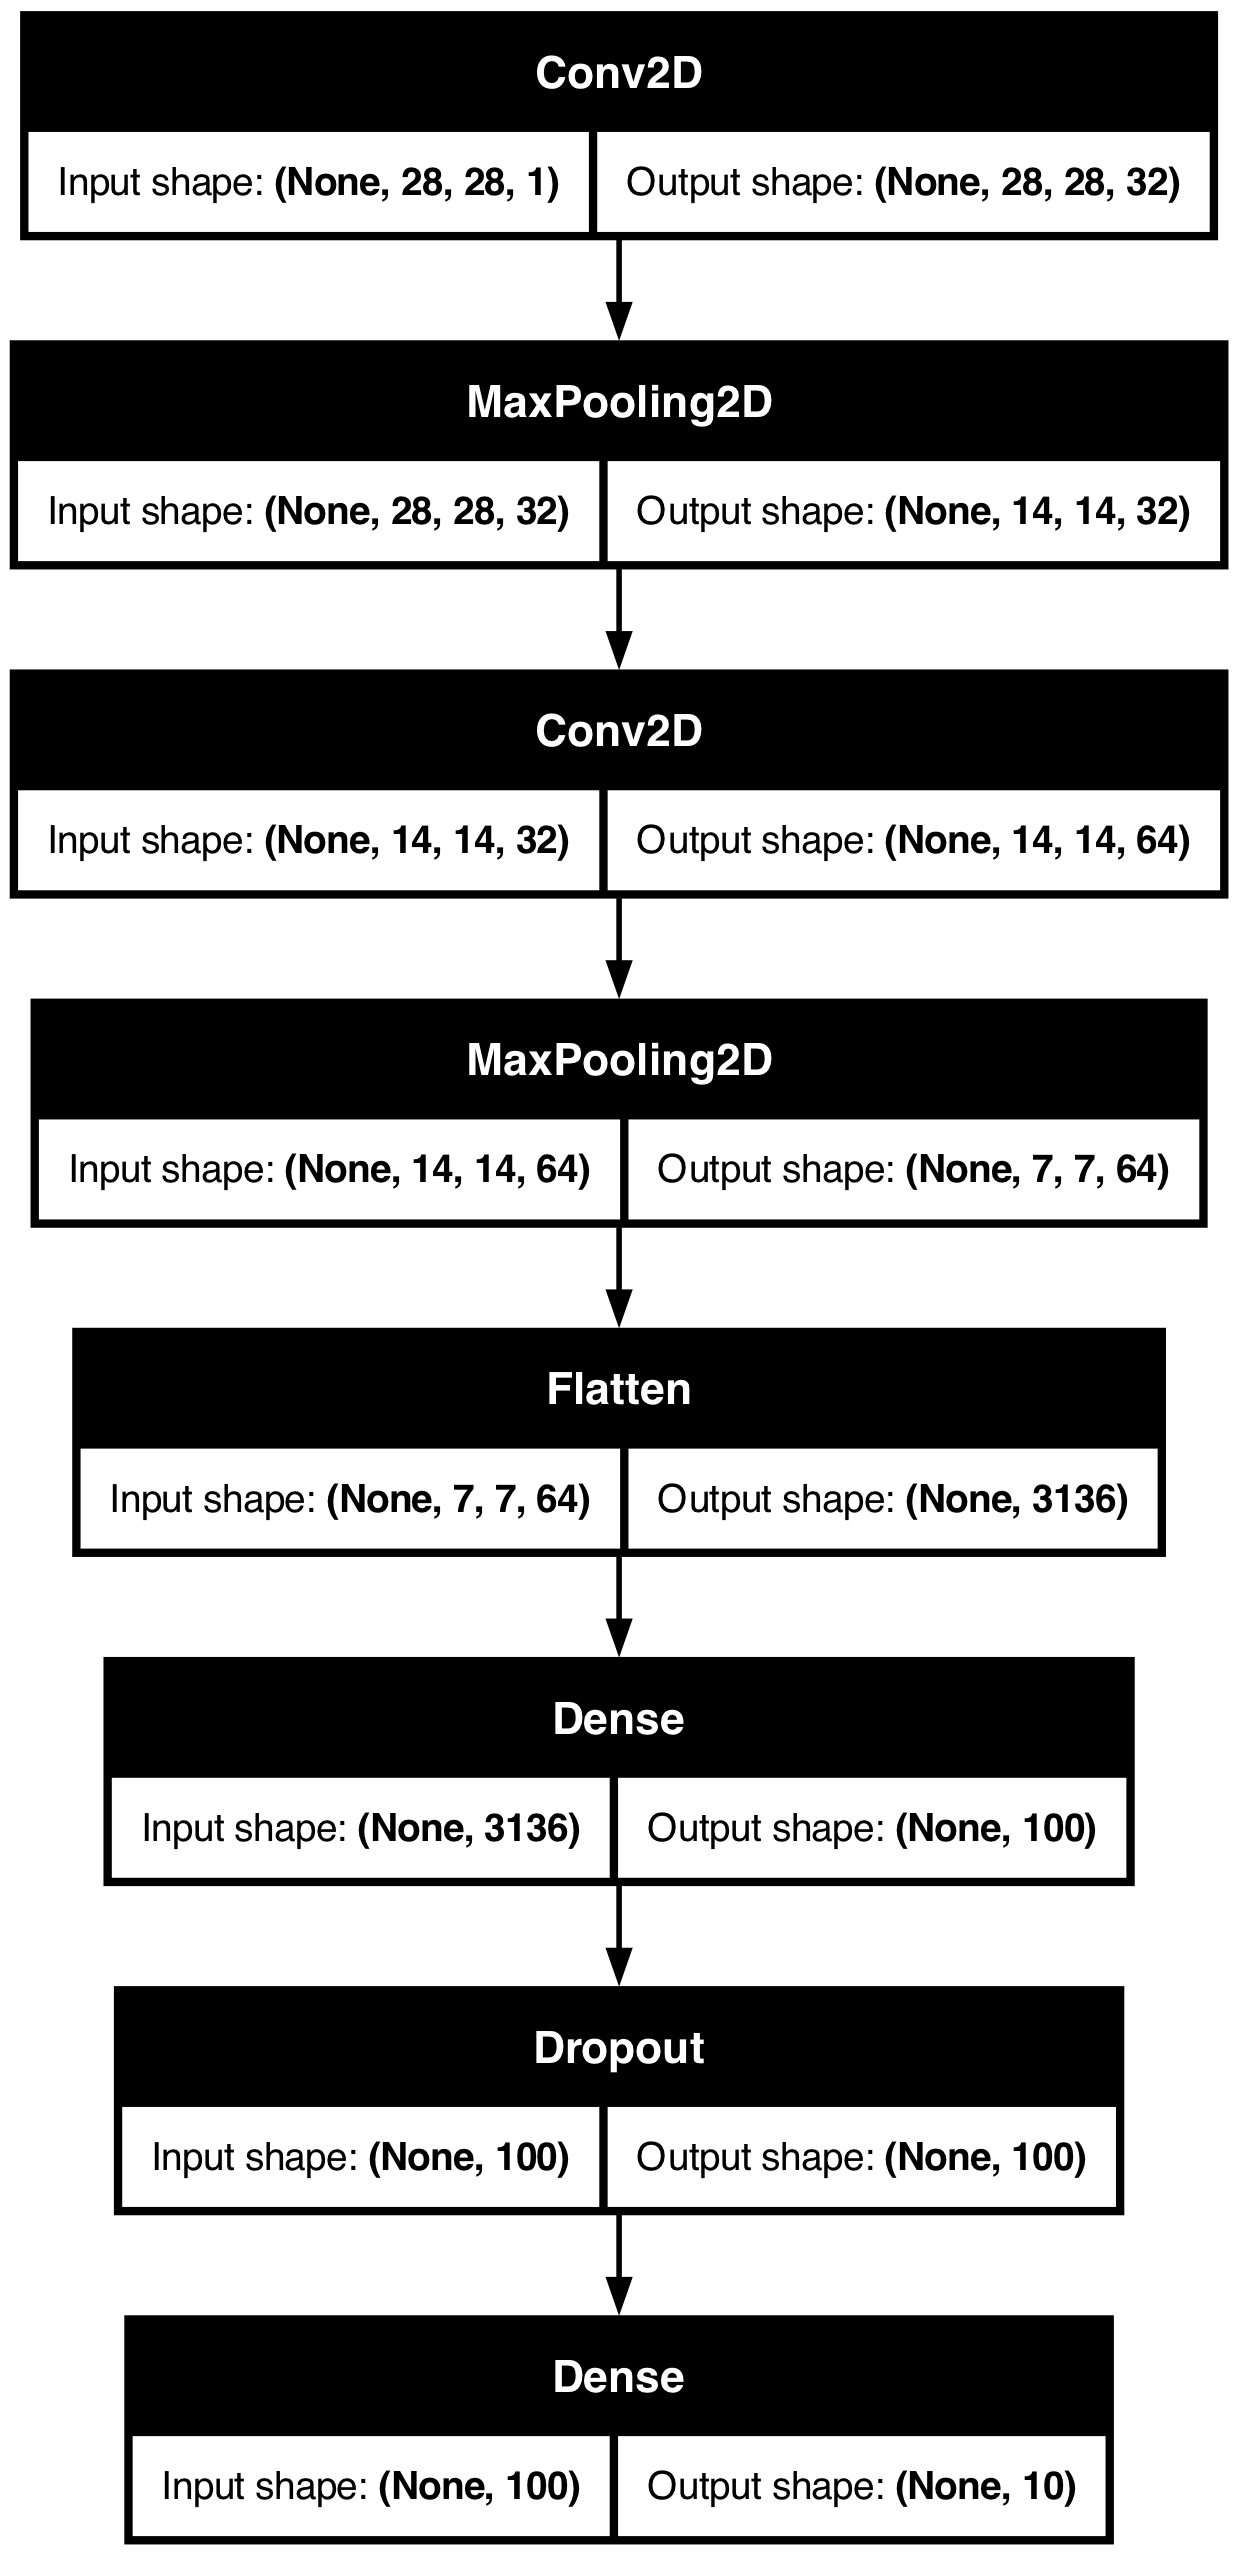

In [71]:
# show_shapes를 True로 두면, 입력과 출력층의 모습을 보여줍니다.
keras.utils.plot_model(model, show_shapes=True)

In [72]:
# adam에서 loss을 범주형 엔트로피로 두고 컴파일시켜보죠.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
# 그리고 EarlyStopping을 두어, 과적합 되는것을 방지하겠습니다.
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled,
                    train_target,
                    epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[earlystopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7462 - loss: 0.6995 - val_accuracy: 0.8631 - val_loss: 0.3650
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8694 - loss: 0.3613 - val_accuracy: 0.8970 - val_loss: 0.2834
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8914 - loss: 0.2975 - val_accuracy: 0.9083 - val_loss: 0.2532
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9011 - loss: 0.2720 - val_accuracy: 0.9140 - val_loss: 0.2348
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9141 - loss: 0.2354 - val_accuracy: 0.9152 - val_loss: 0.2297
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9202 - loss: 0.2166 - val_accuracy: 0.9167 - val_loss: 0.2232
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9280 - loss: 0.1985 - val_accuracy: 0.9064 - val_loss: 0.2535
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9327 -

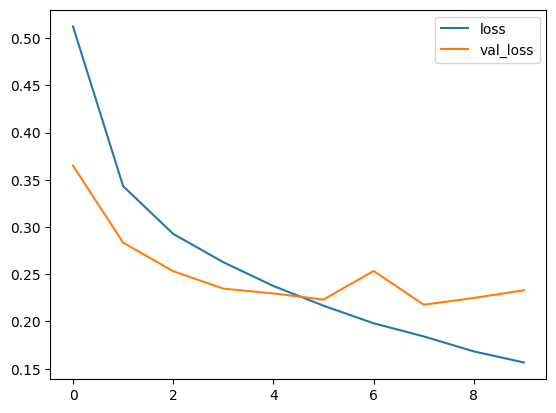

In [74]:
# 해당 모델의 손실 값을 그렸더니 나쁘지 않은 것 같군요.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [75]:
# 검증데이터에 대한 값도 나쁘지 않아 적당히 학습이 된 것 같군요.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.2127


[0.2177397906780243, 0.9225833415985107]

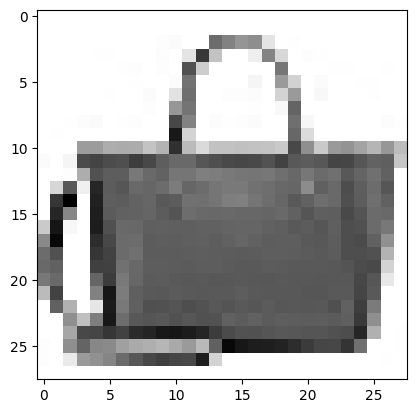

In [77]:
# 첫번째 그림은 가방 그림인것 같죠?
# 원래 val_scaled[0]의 값은 28*28*1로 생겼는데, 이 값을 28*28의 값으로 바꾸어 줘야 그림이 그려진답니다.
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')

In [78]:
# 첫번째 값을 예측해볼텐데 왜 val_scaled[0:1]로 배열 인덱싱을 사용할까요?
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.72985386e-18 8.94503266e-28 6.00341904e-20 1.26075737e-22
  1.01744812e-19 1.58578713e-18 4.58507299e-19 1.06670525e-16
  1.00000000e+00 2.56591177e-23]]


In [79]:
# 기본적으로 입력 모델이 (1, 28, 28, 1)이어야 학습을 진행할 수 있습니다.
val_scaled[0:1].shape

(1, 28, 28, 1)

In [80]:
# 하지만, 인덱싱으로 지정하지 않으면 몇번째 데이터인지가 사라지게 되죠.
val_scaled[0].shape

(28, 28, 1)

<BarContainer object of 10 artists>

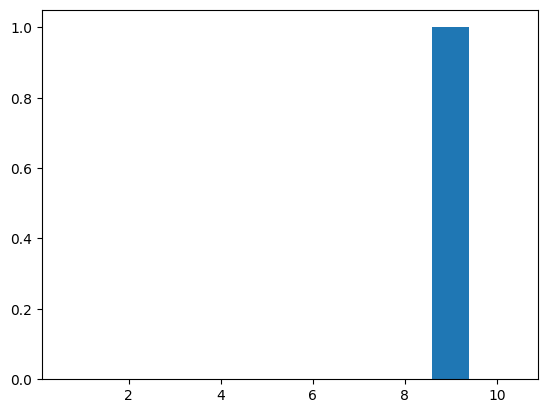

In [81]:
# 각 값들에 대한 그래프를 그려보면 9번째의 값이 가장 크다는 것을 알 수 있죠.
plt.bar(range(1, 11), preds[0])

In [82]:
# 이렇게 classes로 해당 라벨을 구축한 뒤에 argmax를 사용하면 어떤 값으로 예측했는지를 알 수 있습니다.
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트' ,'샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
classes[np.argmax(preds)]

'가방'

In [83]:
# 테스트 데이터도 전처리해서 확인해볼까요?
test_scaled = test_input.reshape(-1, 28, 28, 1)/255

In [84]:
# 괜찮은 값이 나왔군요! 나쁘지 않은 결과입니다.!!
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9154 - loss: 0.2495


[0.24057377874851227, 0.9171000123023987]